# Triangle Counting

These are translations of the methods for triangle counting from LAGraph_tricount()

In [15]:
from pygraphblas import *
from pygraphblas.gviz import *

prob = dict(Matrix.ssget('Newman/karate'))
M = prob['karate.mtx'].cast(INT64)

In [16]:
def cohen(A, U, L):
    return L.mxm(U, mask=A).reduce_int() // 2
    
cohen(M, M.triu(), M.tril())

45

In [17]:
def sandia_dot(A, U, L):
    return L.mxm(U.transpose(), mask=L).reduce_int()

sandia_dot(M, M.triu(), M.tril())

45

156
45


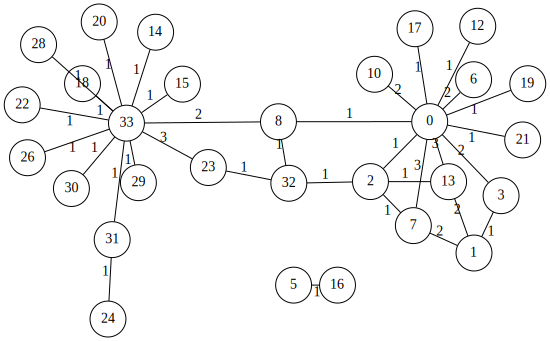

In [18]:
def sandia(A, L):
    return L.mxm(L, mask=L)

print(M.nvals)
S = sandia(M, M.tril())
print(S.reduce_int())
draw(S, directed=False, graph_attr=dict(layout='sfdp'))

In [21]:
%timeit sandia(M, M.tril())

24.5 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
%timeit sandia_dot(M, M.triu(), M.tril())

47.5 µs ± 629 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit cohen(M, M.tril(), M.triu())

39.3 µs ± 319 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
